Import Statements

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from pathlib import Path
import os
import yaml
os.getcwd()

'/home/dominic/Documents/research/superconducting_circuit_sim/geometric_gate/Setiawan2022/notebooks'

Import Data

In [9]:
project_root = '../'
output_dir = os.path.join(project_root, 'output')
pulse_dir = os.path.join(output_dir, 'pulses')
gate_dir = os.path.join(output_dir, 'sim_results')

with open(os.path.join(pulse_dir, 'cache_desc.yaml'), 'r') as yamlHandle:
    pulse_cache_desc = yaml.safe_load(yamlHandle)
cz_config = pulse_cache_desc['CZ']
cz_pulse = np.load(f'{pulse_dir}/CZ.npy', allow_pickle=True)
cz_delta_wmod = np.load(f'{pulse_dir}/CZ-_Pulse__delta_wmod.npy', allow_pickle=True)
# cz_delta_wmod_a = np.array([tstep['A'] for tstep in cz_delta_wmod])
# cz_delta_mmod_b = np.array([tstep['B'] for tstep in cz_delta_wmod])
cz_g_ac = np.load(f'{pulse_dir}/CZ-_Pulse__g_ac.npy', allow_pickle=True)[()]
cz_omega_A = np.load(f'{pulse_dir}/CZ-_Pulse__omega_A.npy', allow_pickle=True)
cz_omega_B = np.load(f'{pulse_dir}/CZ-_Pulse__omega_B.npy', allow_pickle=True)


In [10]:
cz_g_ac

{'A': array([-0.-0.j, -0.-0.j, -0.-0.j, ..., -0.-0.j, -0.-0.j, -0.-0.j]),
 'B': array([ 0.00000000e+00+0.00000000e+00j,  3.59996230e-05+0.00000000e+00j,
         1.43993236e-04+0.00000000e+00j, ...,
        -1.78723988e-02+2.18873760e-18j, -1.19163824e-02+1.45933596e-18j,
        -5.95862617e-03+7.29721247e-19j])}

## Make Pulse Plots

/home/dominic/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


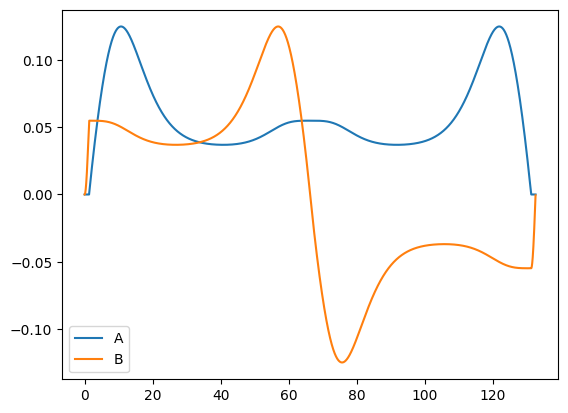

In [11]:
tlist_omegas = np.arange(0, tg + 2* t_ramp, dt)
plt.plot(tlist_omegas, cz_omega_A, label='A')
plt.plot(tlist_omegas, cz_omega_B, label='B')
plt.legend()
plt.show()

In [ ]:
plt.plot(tlist_omegas, cz_pulse)